In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The goal of this homework is to create a regression model for prediction apartment prices (column `price`)

EDA

* Load the data.
* Look at the price variable. Does it have a long tail?

Features

For the rest of the homework, you'll need to use only these columns:

* `latitude`
* `longitude`
* `price`
* `minimum_nights`
* `number_of_reviews`
* `reviews_per_month`
* `calculated_host_listings_count`
* `availability_365`

In [3]:
cols = ['latitude', 'longitude', 'price', 'minimum_nights', 
         'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = pd.read_csv('nyc_airbnb.csv', usecols=cols)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


## Q1

Find a feature with missing values. How many missing values does it have?

In [3]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Q2

What's the median (50% percentile) for variable 'minimum_nights'?

In [4]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

### Split the Data

* Shuffle the initial dataset, use seed `42`
* Split your data in train/val/test sets, with 60%/20%/20% distribution
* Make sure the target value, `price`, is not in your DataFrame
* Apply the log transformation to the `price` variable using the `np.log1p()` function

In [5]:
n = len(df)

n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test

In [6]:
n, n_val + n_test + n_train

(48895, 48895)

In [7]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [8]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [9]:
# shuffle to make sure you randomize your data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [10]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [11]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [12]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [13]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [14]:
del df_train['price']
del df_val['price']
del df_test['price']

In [15]:
len(y_train)

29337

## Q3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

g(X) $\approx$ y

g = model

X = Feature matrix (training)

y = Target (price)

In [16]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [17]:
df_train.iloc[10]

latitude                           40.75078
longitude                         -73.87949
minimum_nights                      1.00000
number_of_reviews                   4.00000
reviews_per_month                   2.11000
calculated_host_listings_count      4.00000
availability_365                  354.00000
Name: 44211, dtype: float64

In [18]:
fill_of_0 = df_train.fillna(value=0)
fill_of_0.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
fill_of_0.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000
mean,40.729226,-73.951838,6.989740,23.312336,1.088747,7.125166,112.825988
std,0.054399,0.046325,21.014583,44.628122,1.575070,32.844933,131.730809
min,40.507080,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690460,-73.982890,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723450,-73.955590,2.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763170,-73.935880,5.000000,24.000000,1.580000,2.000000,228.000000
max,40.913060,-73.712990,1000.000000,629.000000,27.950000,327.000000,365.000000


In [20]:
fill_of_avg = df_train.fillna(value=df_train['reviews_per_month'].mean())
fill_of_avg.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000
mean,40.729226,-73.951838,6.989740,23.312336,1.368549,7.125166,112.825988
std,0.054399,0.046325,21.014583,44.628122,1.475196,32.844933,131.730809
min,40.507080,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690460,-73.982890,1.000000,1.000000,0.270000,1.000000,0.000000
50%,40.723450,-73.955590,2.000000,5.000000,1.210000,1.000000,45.000000
75%,40.763170,-73.935880,5.000000,24.000000,1.580000,2.000000,228.000000
max,40.913060,-73.712990,1000.000000,629.000000,27.950000,327.000000,365.000000


In [21]:
# use for baseline
# this is the untouched, meaning, there are still NaN values
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [22]:
df_train.dtypes

latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [23]:
def train_linear_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### Filling In With 0

In [24]:
X_train_0 = fill_of_0.values
X_train_0

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [29]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [26]:
w0tr, wtr = train_linear_reg(X_train_0, y_train)

In [27]:
y_pred_0 = w0tr + X_train_0.dot(wtr)
y_pred_0

array([4.7827747 , 4.45947456, 4.89702083, ..., 4.82048871, 4.86944871,
       4.61612559])

#### Filling In With Average

In [30]:
X_train_avg = fill_of_avg.values
X_train_avg

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [31]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [32]:
w0avg, wavg = train_linear_reg(X_train_avg, y_train)

In [33]:
y_pred_avg = w0avg + X_train_avg.dot(wavg)
y_pred_avg

array([4.76589611, 4.45581848, 4.89107725, ..., 4.83526871, 4.87768975,
       4.60682893])

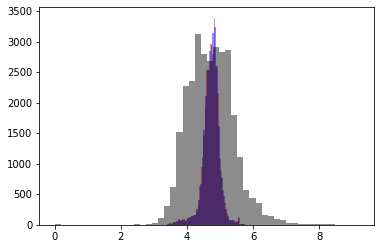

In [35]:
plt.hist(y_pred_avg, color='red', bins=50, alpha=.45)
plt.hist(y_pred_0, color='blue', bins=50, alpha=.45)
plt.hist(y_train, color='black', bins=50, alpha=.45)
plt.show()

### RMSE

In [36]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Filled In With 0

In [37]:
rmse_score_0 = rmse(y_train, y_pred_0)
rmse_score_0

0.6428860484860446

In [38]:
round(rmse_score_0, 2)

0.64

#### Filled in With Average

In [39]:
rmse_score_avg = rmse(y_train, y_pred_avg)
rmse_score_avg

0.6429347474014225

In [40]:
round(rmse_score_avg, 2)

0.64

## 4


* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [41]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [46]:
w0, w = train_linear_regression_reg(X_train_0, y_train, 0)

y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6148743914416451

In [51]:
w0, w = train_linear_regression_reg(X_train_0, y_train, .000001)

y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6148741730136127

In [53]:
w0, w = train_linear_regression_reg(X_train_0, y_train, .001)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6151385705342494

In [54]:
w0, w = train_linear_regression_reg(X_train_0, y_train, .01)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6257899179247634

In [55]:
w0, w = train_linear_regression_reg(X_train_0, y_train, .1)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6469706075046462

In [56]:
w0, w = train_linear_regression_reg(X_train_0, y_train, 1)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6519514370526176

In [57]:
w0, w = train_linear_regression_reg(X_train_0, y_train, 5)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6524378528230385

In [58]:
w0, w = train_linear_regression_reg(X_train_0, y_train, 10)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

0.6524962776812122

## 5


* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits `(round(std, 3))`

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [22]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)
n = len(df)

n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test

In [23]:
df.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
n, n_val + n_test + n_train

(48895, 48895)

In [25]:
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [26]:
idx = np.arange(n)
np.random.seed(0)
np.random.shuffle(idx)

In [27]:
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [28]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [29]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
43813,40.72430,-74.01110,225,3,0,0.00,1,42
32734,40.72555,-73.99283,649,1,5,0.40,1,75
25276,40.71687,-73.95012,300,5,5,0.35,3,31
36084,40.64036,-74.00822,26,1,13,1.36,5,141
17736,40.68370,-73.93325,125,2,4,0.12,1,0


In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [32]:
del df_train['price']
del df_val['price']
del df_test['price']

In [33]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [40]:
X_train = df.values

In [42]:
w0, w = train_linear_regression(X_train, y_train)
w0

ValueError: shapes (9,48895) and (29337,) not aligned: 48895 (dim 1) != 29337 (dim 0)

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?